In [4]:
from jBook_tools import *
plt.rcParams['figure.figsize'] = [15, 5] #Plotgröße anpassen

from myst_nb import glue
from scipy.fft import fft, fftfreq,rfft, rfftfreq
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [40]:
ut = symbols('u(t)')
sym_legend = assign_meta_data(sym_legend,ut,'Spannung in abhängigkeit der Zeit')

a0 = symbols('a_0')
sym_legend = assign_meta_data(sym_legend,a0,'Fourier Koeffizient bei k = 0')

ak = symbols('a_k')
sym_legend = assign_meta_data(sym_legend,ak,'Fourier Koeffizient')

bk = symbols('a_k')
sym_legend = assign_meta_data(sym_legend,bk,'Fourier Koeffizient')

k = symbols('k')
sym_legend = assign_meta_data(sym_legend,k,'Fourier Laufvariable')

w0 = symbols('omega_0')
sym_legend = assign_meta_data(sym_legend,w0,'Bezugskreisfrequenz, Grundkreisfrequenz')

wk = symbols('w_k')
sym_legend = assign_meta_data(sym_legend,wk,'Kreisfrequenz der Oberschwingung')

t = symbols('t')
sym_legend = assign_meta_data(sym_legend,t,'Zeit')

T = symbols('T')
sym_legend = assign_meta_data(sym_legend,T,'Periodendauer')

f = Function('f')
func_legend = assign_meta_data(sym_legend,f,'Funktion in Abhängigkeit der Zeit')


#add to glue
for key in sym_legend:
    try:
        glue(key.name, key, display=False)
    except:
        pass


# Fourier Zerlegung
## Legende

In [19]:
for key in sym_legend:
    display(Latex(' ' + latex(key) + '  ...  \\textrm{' + sym_legend[key] + '}' ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Grundlagen und Ziel
Mit der Fourierzerlegung können die einzelnen Frequenzkomponenten aus denen ein Signal besteht bestimmt werden. Dies ist besonders wichtig um zum Beuipiel die Bandbreite eines Siganles zu bestimme oder zu beurteilen welche Auswirkungen ein Filter auf ein Signal hat. Die gängge Darstellung ist das Frequenzspektrum welches meist mittels *Fast Fourier Transformation* ermittelt wird. An dieser Stelle soll eine Einführung in die Fourierzerlegung geboten werden.  
Für eine reine Sinusschwingung ist eine mathematische behandlung nicht notwendig um die Frequenz zu bestimmen. Diese kann direkt aus der Periodendauer ermittelt werden. Wenn also der hier beschriebene mathematische Aufwand betrieben werden soll handelt es sich um überlagerte harmonsiche und nicht harmonische periodische Signale. Es können aber auch nicht periodische Singale auf deren Frequenzen hin untersucht werden. In Summe also ein sehr mächtiges Werkzeug in der Singalanalyse. An dieser Stelle wird auf eine mathematisch allgemeine Formulierung zurückgegriffen. Das bedeutet es wird nicht in elektrischen Größen gerechnet sond mit allgemeinen Funktionen und Signalen.   
Jean-Baptiste Joseph Fourier (1768-183) war ein Mann dessen Biographie lesenswert ist. Er stellte die Theorie auf, dass jedes periodische nicht harmonsiche Signal,in harmonsiche Signale zerlegt werden, die die Frequenz des nicht harmonsichen Signals und ganzzahlige Vielfache besitzen.  Die Fourier Reihe lässt sich mit ihren Koeffiezenten wie folgt anschreiben.

In [48]:
eqft1=Eq(f(t),a0/2+Sum(ak+cos(k*w0*t)+bk*sin(k*w0*t),(k,1,oo)))
display(eqft1)
eqak1=Eq(ak,2/T*integrate(ft(t)*cos(k*w0*t),(t,0,T)))
display(eqak1)
eqbk1=Eq(bk,2/T*integrate(ft(t)*sin(k*w0*t),(t,0,T)))
display(eqak1)

              ∞                                      
             ___                                     
             ╲                                       
       a₀     ╲                                      
f(t) = ── +   ╱   (aₖ⋅sin(k⋅ω₀⋅t) + aₖ + cos(k⋅ω₀⋅t))
       2     ╱                                       
             ‾‾‾                                     
            k = 1                                    

       T                    
       ⌠                    
     2⋅⎮ f(t)⋅cos(k⋅ω₀⋅t) dt
       ⌡                    
       0                    
aₖ = ───────────────────────
                T           

       T                    
       ⌠                    
     2⋅⎮ f(t)⋅cos(k⋅ω₀⋅t) dt
       ⌡                    
       0                    
aₖ = ───────────────────────
                T           

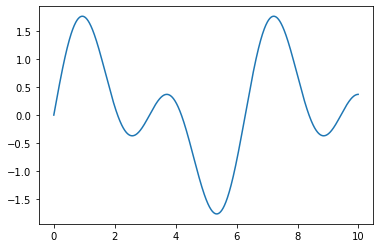

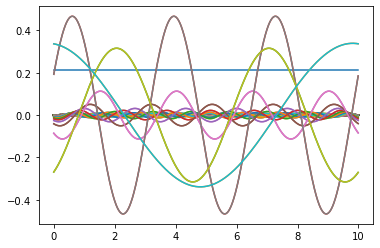

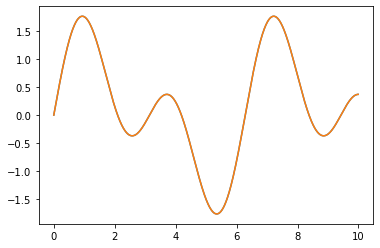

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0, 10, 0.01)
x2 = np.arange(0, 20, 0.02)
sin1 = np.sin(x)
sin2 = np.sin(x2)
x2 /= 2
sin3 = sin1 + sin2
plt.plot(x, sin3)
plt.show()

def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 10, 10 / len(data))
    freqs = np.fft.fftfreq(len(x), .01)
    recomb = np.zeros((len(x),))
    for i in range(len(fft3)):
        if abs(fft3[i]) / len(x) > threshold:
            sinewave = (
                1 
                / len(x) 
                * (
                    fft3[i].real 
                    * np.cos(freqs[i] * 2 * np.pi * x) 
                    - fft3[i].imag 
                    * np.sin(freqs[i] * 2 * np.pi * x)))
            recomb += sinewave
            plt.plot(x, sinewave)
    plt.show()

    plt.plot(x, recomb, x, data)
    plt.show()
    
decompose_fft(sin3, threshold=0.0)

In [ ]:
import cmath
def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 10, 10 / len(data))
    freqs = np.fft.fftfreq(len(x),.01)
    threshold = 0.0
    recomb = np.zeros((len(x),))
    middle = len(x)//2 + 1
    for i in range(middle):
        if abs(fft3[i])/(len(x)) > threshold:
            if i == 0:
                coeff = 2
            else:
                coeff = 1
            sinusoid = 1/(len(x)*coeff/2)*(abs(fft3[i])*np.cos(freqs[i]*2*np.pi*x+cmath.phase(fft3[i])))
            recomb += sinusoid
            plt.plot(x,sinusoid)
    plt.show()

    plt.plot(x,recomb,x,sin3)
    plt.show()

decompose_fft(sin3, threshold=0.0)